In [1]:
# !pip install nbimporter

In [2]:
# import os
# import numpy as np
# import torch
# # from nbimporter import notebook
# from sklearn.metrics.pairwise import cosine_similarity
# import matplotlib.pyplot as plt

# # Import necessary functions from the notebook (extract-features.ipynb)
# # from extract_features import get_enhanced_features
# import nbimporter
# from extract_features import get_enhanced_features  # ✅ Correct usage


# from model_init import load_model, preprocess_image  # Keep these imports

# def main():
#     # Paths
#     test_folder = "../60_images_of_6_cows/test-images"
#     features_file = "reference_features_autoencoder.npy"
#     filenames_file = "reference_filenames_autoencoder.npy"
#     model_path = "./models/autoencoder_model30-100.pth"

#     # Device setup
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     print(f"Using device: {device}")

#     try:
#         # Load reference data
#         print("Loading reference features...")
#         reference_features = np.load(features_file)
#         reference_filenames = np.load(filenames_file)
#         print(f"Loaded {len(reference_features)} reference samples")

#         # Load model
#         print("Loading model...")
#         model = load_model(model_path, device)

#         # Test evaluation
#         print("\nStarting evaluation...")
#         results = []
#         correct = 0
#         total = 0

#         for test_filename in sorted(os.listdir(test_folder)):
#             if not test_filename.lower().endswith((".jpg", ".png", ".jpeg")):
#                 continue

#             try:
#                 test_path = os.path.join(test_folder, test_filename)
                
#                 # Preprocess and extract features
#                 image_tensor = preprocess_image(test_path)
#                 test_feature = get_enhanced_features(model, image_tensor, device)
                
#                 # Get top matches
#                 matches = get_top_matches(test_feature, reference_features, reference_filenames, top_k=3)
                
#                 # Evaluate
#                 test_id = test_filename.split("_")[0]
#                 is_correct = any(test_id == match[0].split("_")[0] for match in matches)
                
#                 # Store results
#                 total += 1
#                 correct += int(is_correct)
#                 results.append({
#                     'test_file': test_filename,
#                     'top_matches': matches,
#                     'correct': is_correct
#                 })

#                 # Print immediate result
#                 print(f"\nTest: {test_filename}")
#                 for i, (match, score) in enumerate(matches, 1):
#                     print(f"Match {i}: {match} (score: {score:.4f})")
#                 print(f"Correct: {is_correct}")

#             except Exception as e:
#                 print(f"\nError processing {test_filename}: {str(e)}")
#                 continue

#         # Final evaluation
#         if total > 0:
#             accuracy = correct / total * 100
#             print("\n" + "="*50)
#             print(f"FINAL RESULTS\nTotal images: {total}")
#             print(f"Correct matches: {correct}")
#             print(f"Accuracy: {accuracy:.2f}%")
#             print("="*50)

#             # Plot some examples
#             plot_example_results(results, reference_features, reference_filenames)

#     except Exception as e:
#         print(f"\nError in main execution: {str(e)}")

# def get_top_matches(test_feature, reference_features, reference_filenames, top_k=3):
#     """Improved matching with cosine similarity and softmax scaling"""
#     # Reshape features if needed
#     test_feature = test_feature.reshape(1, -1)
#     ref_features = reference_features.reshape(len(reference_features), -1)
    
#     # Cosine similarity
#     similarities = cosine_similarity(test_feature, ref_features)[0]
    
#     # Softmax with temperature
#     temperature = 10.0
#     exp_scores = np.exp(similarities * temperature)
#     probs = exp_scores / np.sum(exp_scores)
    
#     # Get top matches
#     top_indices = np.argsort(probs)[-top_k:][::-1]
#     return [
#         (reference_filenames[i], float(probs[i]))
#         for i in top_indices
#     ]

# def plot_example_results(results, reference_features, reference_filenames, num_examples=5):
#     """Visualize some example results"""
#     plt.figure(figsize=(15, 10))
    
#     for i, result in enumerate(results[:num_examples], 1):
#         plt.subplot(num_examples, 1, i)
        
#         test_id = result['test_file'].split('_')[0]
#         matches = result['top_matches']
        
#         # Get match IDs and scores
#         match_ids = [m[0].split('_')[0] for m in matches]
#         scores = [m[1] for m in matches]
        
#         # Create bar plot
#         x = np.arange(len(matches))
#         colors = ['green' if mid == test_id else 'red' for mid in match_ids]
        
#         plt.bar(x, scores, color=colors)
#         plt.xticks(x, match_ids)
#         plt.ylabel('Similarity Score')
#         plt.title(f'Test Image: {result["test_file"]} (Correct: {result["correct"]})')
    
#     plt.tight_layout()
#     plt.savefig('matching_results.png')
#     print("\nSaved visualization to 'matching_results.png'")

# if __name__ == "__main__":
#     main()


In [3]:
# import os
# import numpy as np
# import torch
# import matplotlib.pyplot as plt

# import nbimporter
# from extract_features import get_enhanced_features  # ✅ Correct usage
# from model_init import load_model, preprocess_image

# def safe_mahalanobis(u, v, var):
#     delta = u - v
#     return np.sqrt(np.sum((delta ** 2) / (var + 1e-8)))  # Avoid division by zero

# def get_top_matches(test_feature, reference_features, reference_filenames, var_vector, top_k=1):
#     test_feature = test_feature.flatten()
#     reference_features = reference_features.reshape(len(reference_features), -1)

#     distances = np.array([
#         safe_mahalanobis(test_feature, ref_feat, var_vector)
#         for ref_feat in reference_features
#     ])
#     top_indices = np.argsort(distances)[:top_k]
#     return [(reference_filenames[i], float(distances[i])) for i in top_indices]

# def plot_example_results(results, num_examples=5):
#     if not results:
#         print("No results to visualize.")
#         return

#     plt.figure(figsize=(15, 10))
#     for i, result in enumerate(results[:num_examples], 1):
#         plt.subplot(num_examples, 1, i)
#         test_id = result['test_file'].split('_')[0]
#         matches = result['top_matches']
#         match_ids = [m[0].split('_')[0] for m in matches]
#         scores = [m[1] for m in matches]
#         x = np.arange(len(matches))
#         colors = ['green' if mid == test_id else 'red' for mid in match_ids]

#         plt.bar(x, scores, color=colors)
#         plt.xticks(x, match_ids)
#         plt.ylabel('Distance')
#         plt.title(f'Test: {result["test_file"]} (Correct: {result["correct"]})')


#     plt.tight_layout()
#     plt.savefig('matching_results.png')
#     print("Saved results to 'matching_results.png'")
#     plt.close()

# def main():
#     test_folder = "../60_images_of_6_cows/test-images"
#     features_file = "reference_features_autoencoder.npy"
#     filenames_file = "reference_filenames_autoencoder.npy"
#     model_path = "./models/autoencoder_model30-100.pth"

#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     print(f"Using device: {device}")

#     try:
#         reference_features = np.load(features_file)
#         reference_filenames = np.load(filenames_file)
#         print(f"Loaded {len(reference_features)} reference samples")

#         reference_flat = reference_features.reshape(len(reference_features), -1)
#         var_vector = np.var(reference_flat, axis=0)

#         print("Loading model...")
#         model = load_model(model_path, device)

#         print("Evaluating...")
#         results = []
#         correct = 0
#         total = 0

#         for test_filename in sorted(os.listdir(test_folder)):
#             if not test_filename.lower().endswith((".jpg", ".png", ".jpeg")):
#                 continue

#             try:
#                 test_path = os.path.join(test_folder, test_filename)
#                 image_tensor = preprocess_image(test_path)
#                 test_feature = get_enhanced_features(model, image_tensor, device)

#                 matches = get_top_matches(
#                     test_feature,
#                     reference_features,
#                     reference_filenames,
#                     var_vector,
#                     top_k=1
#                 )

#                 test_id = test_filename.split("_")[0]
#                 is_correct = any(test_id == match[0].split("_")[0] for match in matches)
#                 total += 1
#                 correct += int(is_correct)

#                 results.append({
#                     'test_file': test_filename,
#                     'top_matches': matches,
#                     'correct': is_correct
#                 })

#                 print(f"\nTest: {test_filename}")
#                 for i, (match, score) in enumerate(matches, 1):
#                     print(f"Match {i}: {match} (distance: {score:.4f})")
#                 print(f"Correct: {is_correct}")

#             except Exception as e:
#                 print(f"Error processing {test_filename}: {str(e)}")

#         if total > 0:
#             accuracy = correct / total * 100
#             print("\n" + "="*50)
#             print(f"FINAL RESULTS\nTotal images: {total}")
#             print(f"Correct matches: {correct}")
#             print(f"Accuracy: {accuracy:.2f}%")
#             print("="*50)

#             plot_example_results(results)

#     except Exception as e:
#         print(f"Fatal error in main: {str(e)}")

# if __name__ == "__main__":
#     main()


/Users/niteshkumar/conda/envs/tf_env/lib/python3.9/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Using device: cpu
Loading reference features...
Loaded 6 reference samples
Loading model...

Starting evaluation...

Test: 207_01.jpg
Match 1: 221_1.jpg (score: 0.1703)
Match 2: 216_1.jpg (score: 0.1696)
Match 3: 207_1.jpg (score: 0.1685)
Correct: True

Test: 207_02.jpg
Match 1: 221_1.jpg (score: 0.1709)
Match 2: 216_1.jpg (score: 0.1694)
Match 3: 207_1.jpg (score: 0.1676)
Correct: True

Test: 207_03.jpg
Match 1: 221_1.jpg (score: 0.1709)
Match 2: 216_1.jpg (score: 0.1700)
Match 3: 207_1.jpg (score: 0.1681)
Correct: True

Test: 207_04.jpg
Match 1: 221_1.jpg (score: 0.1708)
Match 2: 216_1.jpg (score: 0.1695)
Match 3: 207_1.jpg (score: 0.1685)
Correct: True

Test: 207_05.jpg
Match 1: 221_1.jpg (score: 0.1711)
Match 2: 216_1.jpg (score: 0.1696)
Match 3: 207_1.jpg (score: 0.1672)
Correct: True

Test: 207_06.jpg
Match 1: 221_1.jpg (score: 0.1710)
Match 2: 216_1.jpg (score: 0.1696)
Match 3: 207_1.jpg (score: 0.1668)
Correct: True

Test: 207_07.jpg
Match 1: 221_1.jpg (score: 0.1714)
Match 2: 

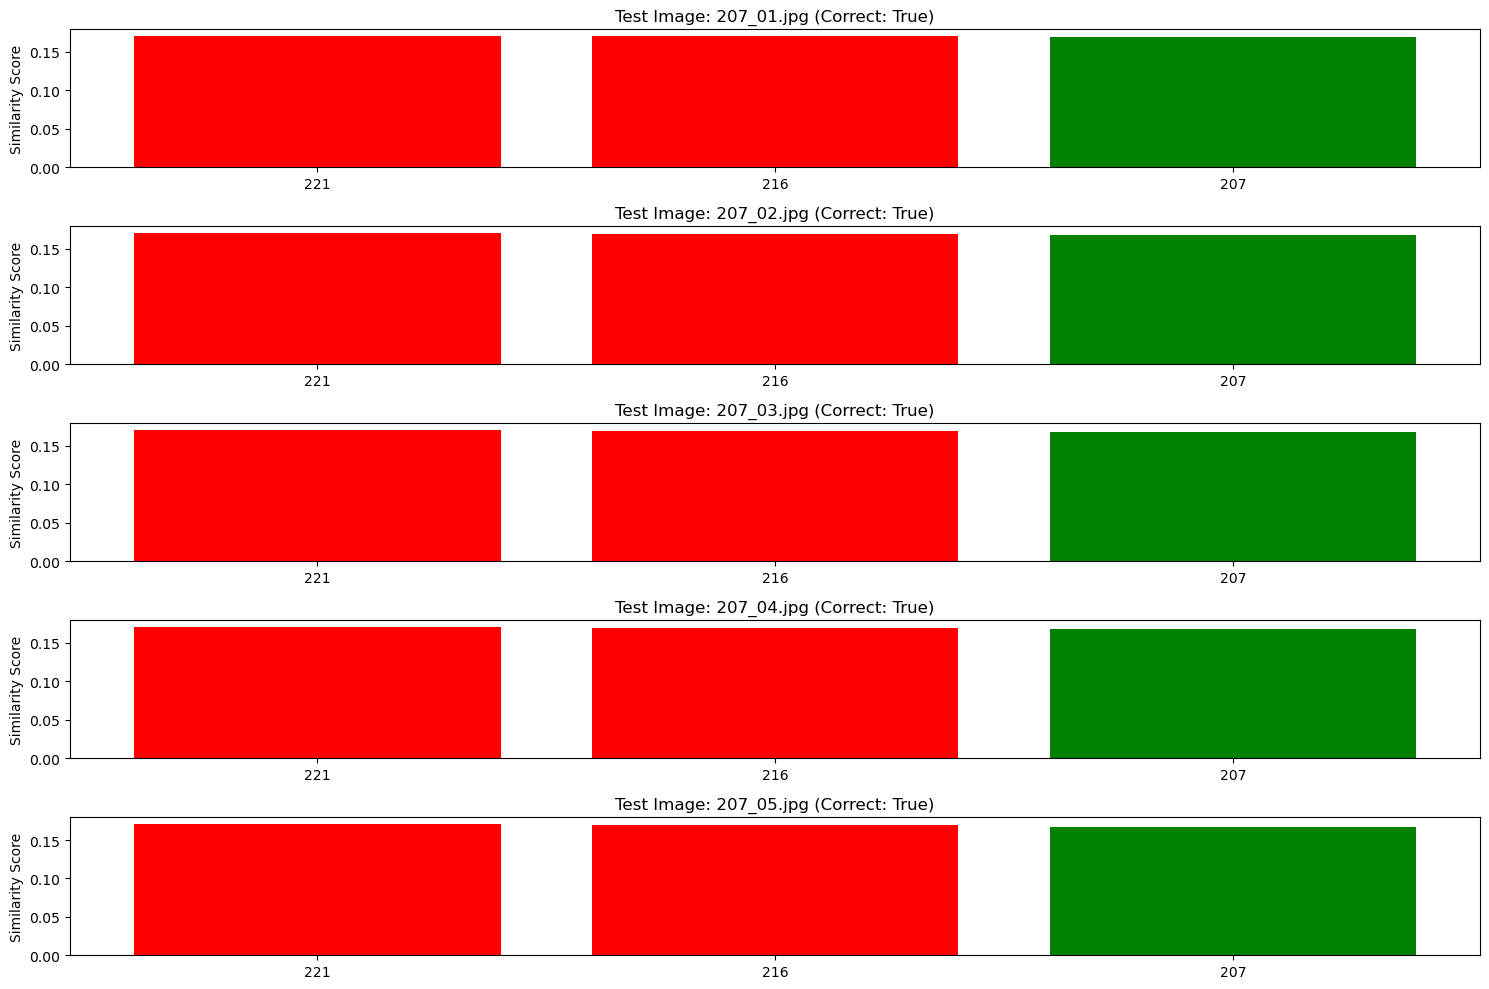

In [4]:
import os
import numpy as np
import torch
# from nbimporter import notebook
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Import necessary functions from the notebook (extract-features.ipynb)
# from extract_features import get_enhanced_features
import nbimporter
from extract_features import get_enhanced_features  # ✅ Correct usage


from model_init import load_model, preprocess_image  # Keep these imports

def main():
    # Paths
    test_folder = "../60_images_of_6_cows/test-images"
    features_file = "reference_features_autoencoder.npy"
    filenames_file = "reference_filenames_autoencoder.npy"
    model_path = "./models/autoencoder_model30-100.pth"

    # Device setup
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    try:
        # Load reference data
        print("Loading reference features...")
        reference_features = np.load(features_file)
        reference_filenames = np.load(filenames_file)
        print(f"Loaded {len(reference_features)} reference samples")

        # Load model
        print("Loading model...")
        model = load_model(model_path, device)

        # Test evaluation
        print("\nStarting evaluation...")
        results = []
        correct = 0
        total = 0

        for test_filename in sorted(os.listdir(test_folder)):
            if not test_filename.lower().endswith((".jpg", ".png", ".jpeg")):
                continue

            try:
                test_path = os.path.join(test_folder, test_filename)
                
                # Preprocess and extract features
                image_tensor = preprocess_image(test_path)
                test_feature = get_enhanced_features(model, image_tensor, device)
                
                # Get top matches
                matches = get_top_matches(test_feature, reference_features, reference_filenames, top_k=3)
                
                # Evaluate
                test_id = test_filename.split("_")[0]
                is_correct = any(test_id == match[0].split("_")[0] for match in matches)
                
                # Store results
                total += 1
                correct += int(is_correct)
                results.append({
                    'test_file': test_filename,
                    'top_matches': matches,
                    'correct': is_correct
                })

                # Print immediate result
                print(f"\nTest: {test_filename}")
                for i, (match, score) in enumerate(matches, 1):
                    print(f"Match {i}: {match} (score: {score:.4f})")
                print(f"Correct: {is_correct}")

            except Exception as e:
                print(f"\nError processing {test_filename}: {str(e)}")
                continue

        # Final evaluation
        if total > 0:
            accuracy = correct / total * 100
            print("\n" + "="*50)
            print(f"FINAL RESULTS\nTotal images: {total}")
            print(f"Correct matches: {correct}")
            print(f"Accuracy: {accuracy:.2f}%")
            print("="*50)

            # Plot some examples
            plot_example_results(results, reference_features, reference_filenames)

    except Exception as e:
        print(f"\nError in main execution: {str(e)}")

def get_top_matches(test_feature, reference_features, reference_filenames, top_k=3):
    """Improved matching with cosine similarity and softmax scaling"""
    # Reshape features if needed
    test_feature = test_feature.reshape(1, -1)
    ref_features = reference_features.reshape(len(reference_features), -1)
    
    # Cosine similarity
    similarities = cosine_similarity(test_feature, ref_features)[0]
    
    # Softmax with temperature
    temperature = 10.0
    exp_scores = np.exp(similarities * temperature)
    probs = exp_scores / np.sum(exp_scores)
    
    # Get top matches
    top_indices = np.argsort(probs)[-top_k:][::-1]
    return [
        (reference_filenames[i], float(probs[i]))
        for i in top_indices
    ]

def plot_example_results(results, reference_features, reference_filenames, num_examples=5):
    """Visualize some example results"""
    plt.figure(figsize=(15, 10))
    
    for i, result in enumerate(results[:num_examples], 1):
        plt.subplot(num_examples, 1, i)
        
        test_id = result['test_file'].split('_')[0]
        matches = result['top_matches']
        
        # Get match IDs and scores
        match_ids = [m[0].split('_')[0] for m in matches]
        scores = [m[1] for m in matches]
        
        # Create bar plot
        x = np.arange(len(matches))
        colors = ['green' if mid == test_id else 'red' for mid in match_ids]
        
        plt.bar(x, scores, color=colors)
        plt.xticks(x, match_ids)
        plt.ylabel('Similarity Score')
        plt.title(f'Test Image: {result["test_file"]} (Correct: {result["correct"]})')
    
    plt.tight_layout()
    plt.savefig('matching_results.png')
    print("\nSaved visualization to 'matching_results.png'")

if __name__ == "__main__":
    main()
